# VERİ HİKAYESİ
- Veri seti Flo’dan son alışverişlerini 2020 - 2021 yıllarında OmniChannel (hem online hem offline alışveriş yapan) olarak yapan müşterilerin geçmiş alışveriş davranışlarından elde edilen bilgilerden oluşmaktadır.


 - master_id: Eşsiz müşteri numarası
 - order_channel: Alışveriş yapılan platforma ait hangi kanalın kullanıldığı (Android, ios, Desktop, Mobile)
 - last_order_channel: En son alışverişin yapıldığı kanal
 - first_order_date: Müşterinin yaptığı ilk alışveriş tarihi
 - last_order_date: Müşterinin yaptığı son alışveriş tarihi
 - last_order_date_online: Müşterinin online platformda yaptığı son alışveriş tarihi
 - last_order_date_offline: Müşterinin offline platformda yaptığı son alışveriş tarihi
 - order_num_total_ever_online: Müşterinin online platformda yaptığı toplam alışveriş sayısı
 - order_num_total_ever_offline: Müşterinin offline'da yaptığı toplam alışveriş sayısı
 - customer_value_total_ever_online: Müşterinin offline alışverişlerinde ödediği toplam ücret
 - customer_value_total_ever_offline: Müşterinin online alışverişlerinde ödediği toplam ücret
 - interested_in_categories_12: Müşterinin son 12 ayda alışveriş yaptığı kategorilerin listesi





ilerin listesi

In [ ]:
# İŞ PROBLEMİ:
# Online ayakkabı mağazası olan FLO müşterilerini segmentlere ayırıp
# bu segmentlere göre pazarlama stratejileri belirlemek istiyor.
# Buna yönelik olarak müşterilerin davranışları tanımlanacak
# ve bu davranışlardaki öbeklenmelere göre gruplar oluşturulacak.


import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("flo_data_20K.csv")
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,store_type
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],A
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",A
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",A
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",A
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],A


In [ ]:
# VERİ SETİNE GENEL BAKIŞ:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [ ]:
# VERİ SETİNİN SÜTUNLARI:

df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12', 'store_type'],
      dtype='object')

In [ ]:
# MATEMATİKSEL İŞLEMLER

df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [ ]:
df["master_id"].nunique()  # BENZERSİZ MÜŞTERİ ID NUMARASI (TOPLAM MÜŞTERİ)

19945

In [ ]:
# VERİDE EKSİK DEĞER SORGULAMASI:

df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
store_type                           0
dtype: int64

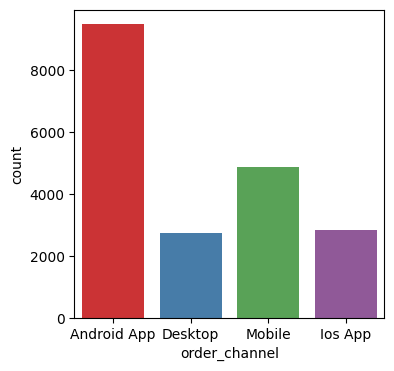

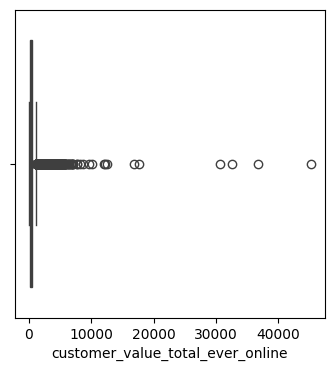

In [ ]:
# GENEL GRAFİKLER

plt.figure(figsize = (4,4))
sns.countplot(x = df["order_channel"],data = df,palette="Set1")
plt.show()


plt.figure(figsize=(4, 4))
sns.boxplot(x = df["customer_value_total_ever_online"],data = df)
plt.show()

In [ ]:
# Her müşterinin toplam alışverisi sayısı "total_order"
# Her müşterinin toplam harcadığı para "total_value"

df["total_order"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["total_value"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"]

In [ ]:
df["total_order"]

0         5.0
1        21.0
2         5.0
3         2.0
4         2.0
         ... 
19940     3.0
19941     2.0
19942     3.0
19943     6.0
19944     2.0
Name: total_order, Length: 19945, dtype: float64

In [ ]:
df["total_value"]

0         939.37
1        2013.55
2         585.32
3         121.97
4         209.98
          ...   
19940     401.96
19941     390.47
19942     632.94
19943    1009.77
19944     261.97
Name: total_value, Length: 19945, dtype: float64

***Zaman belirten değişkenlerimizin type bilgisi object olarak girilmiş. RFM analizinde kullanabilmek için bunu datetime olarak çevireceğiz.***

In [ ]:
for col in df.columns:
    if "date" in col:
        df[col] = pd.to_datetime(df[col])
    

In [ ]:
# DATETİME DEĞİŞİMİ SONRASI SÜTUNLARIN TYPE İNCELEYELİM

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

***Görüldüğü gibi sütunlarımızda date geçen her sütunu to_datetime methodu ile type değiştirdik ve object'den datetime'ye dönüştü***

In [ ]:
# Alışveriş kanallarındaki müşteri sayısının, toplam alınan ürün sayısının ve toplam harcamaların dağılımına bakalım.

df.groupby("order_channel").agg({"total_order":["count","sum"],"total_value":["count","sum"]})

total_order          total_value            
                    count      sum       count         sum
order_channel                                             
Android App          9495  52269.0        9495  7819062.76
Desktop              2735  10920.0        2735  1610321.46
Ios App              2833  15351.0        2833  2525999.93
Mobile               4882  21679.0        4882  3028183.16

# 1. RFM Analizi ile Müşteri Segmentasyonu
RFM metrikleri Recency, Frequency, Monetary.

- Recency: Müşterinin son sipariş tarihinden bu yana kaç gün geçti?
- Frequency: Sipariş sıklığını ifade ediyor, Müşterinin toplam sipariş sayısıdır.
- Monetary: Müşteri şirkete toplamda ne kadar para ödedi?

# İŞ PROBLEMİ

- FLO, müşterilerini segmentlere ayırmak ve bu segmentlere göre pazarlama stratejilerini belirlemek istemektedir. Bu amaçla müşterilerin davranışları tanımlanacak ve bu davranışların kümelenmesine göre gruplar oluşturulacaktır.


# ANALİZ ZAMANI SEÇME
- Elimizdeki veriler 2020-2021 yıllarına ait olduğu için bugünün zamanı ile RFM hesaplaması yapmak mantıksız olacaktır. Bu yüzden analiz tarihini son satın alma tarihinden 2 gün sonrası olacak şekilde seçiyoruz.

In [ ]:
df["last_order_date"].max()    # 2021-05-30 son siapriş tarihi çıktı
today_date = dt.datetime(2021,6,1) # ikigün sonrasını seçiyoruz

# RFM METRİKLERİNİ OLUŞTURALIM¶
- rfm adında yeni bir df oluşturup bize lazım olan değişkenleri onun içine atalım. Lambda ile de Recency'yi hesaplayıp işlem sayımızı azaltalım.
- Yeni oluşturduğumuz rfm DataFrame'inde değişken isimlerini yeniden adlandıralım.ım.

In [ ]:
 rfm = df.agg({"master_id": lambda x: x,
              "last_order_date": lambda x: (today_date - x).days,
              "total_order": lambda x: x,
              "total_value": lambda x: x})


rfm.columns = ["master_id", "recency", "frequency", "monetary"]

rfm.head()

,master_id,recency,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.0,209.98


**Kodun kısaca işlevi**
- master_id sütunundaki değerler olduğu gibi alınır.
- last_order_date sütunundaki tarihler ile today_date arasındaki gün farkları hesaplanır.
- total_order sütunundaki değerler olduğu gibi alınır.
- total_value sütunundaki değerler olduğu gibi alınır.
- Yeni oluşturulan rfm DataFrame'inin sütun isimlerini belirler. Bu sütunlar sırayla master_id, recency, frequency ve monetary olarak adlandırılır.

**Kullanım alanları**
  - Müşteri Segmentasyonu: Müşterileri davranışlarına göre segmentlere ayırarak, her segment için özelleştirilmiş pazarlama stratejileri oluşturabilirsiniz.
  - Pazarlama Kampanyaları: Hangi müşterilerin hangi kampanyalara dahil edileceğini belirlemek için kullanılabilir.
  - Sadakat Programları: Sadık müşterileri belirlemek ve ödüllendirmek için kullanılabilir.
  - Risk Analizi: Müşteri kaybı riski yüksek olan müşterileri belirlemek için kullanılabilir.

**Sütunlar**
- "master_id": Müşteri kimliği.
- "recency": Müşterinin son alışveriş tarihinden bugüne kadar geçen gün sayısı.
- "frequency": Müşterinin toplam alışveriş sayısı.
- "monetary": Müşterinin toplam harcama miktarı.

# RFM SKORLARI OLUŞTURMA
- Elde ettiğimiz RFM metriklerini qcut methodunu kullanarak numaralandıralım. Bu numaralar RFM skorlarımız olacaktır.

In [ ]:
rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels = [5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels = [1,2,3,4,5])
rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels = [1,2,3,4,5])

rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.0,939.37,3,4,4
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.0,2013.55,3,5,5
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.0,585.32,2,4,3
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.0,121.97,3,1,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.0,209.98,3,1,1


# RF DEĞERİ
 - RFM analizinde Recency ve Frequency değerlerini kullanacağız. Bu yüzden bu iki değeri string olarak birleştirmemiz gerek

In [ ]:
rfm["RF_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))
rfm.head()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.0,939.37,3,4,4,34
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.0,2013.55,3,5,5,35
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.0,585.32,2,4,3,24
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.0,121.97,3,1,1,31
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.0,209.98,3,1,1,31
